# Project - Feature Scaling

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- A sport magazine is writing an article on soccer players
- They have a special interest in left-footed players
- A question is whether they playing style can predict if a player is left-footed
- The questions they want to answer:
    - Can you from a features set on players predict if it is left-footed player
    - If so, what features matters the most

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Read the data
- Use ```pd.read_parquet()``` to read the file `files/soccer.parquet`
    - The data is from [Kaggle European Soccer Database](https://www.kaggle.com/hugomathien/soccer)
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [2]:
data = pd.read_parquet('files/soccer.parquet')
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Apply `info()` to get an idea of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

In [4]:
len(data)

183978

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()``` and `.isnull().sum()`

In [5]:
data.isnull().any()

player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking                 True
standing_tackl

In [6]:
data.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

### Step 2.c: Drop missing data
- A great idea is to investigate missing data and outliers
- But for this project we ignore it
- Apply `dropna()`

In [7]:
data=data.dropna()


In [8]:
data.isnull().any()

player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate    False
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                False
dribbling              False
curve                  False
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                False
reactions              False
balance                False
shot_power             False
jumping                False
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                 False
penalties              False
marking                False
standing_tackl

In [9]:
data.isnull().sum()

player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0


### Step 2.d: Limite dataset size
- This project is only for demonstration
- Limit the dataset to the first 2000 rows
    - HINT: `iloc[:2000]`

In [10]:
data = data.iloc[:2000]
#loc => value
#iloc =>index

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Feature Selection
- The classifier we want to predict is `preferred_foot` (independent feature/classification)
- For now we keep the other numeric features as depdent features
    - HINT: Use `.info()` to see numeric columns
    - HINT: Use `.drop([...], axis=1)`
- Assign the dependent features to `X` and the independent feature to `y`

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2043
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_fifa_api_id   2000 non-null   int64  
 1   player_api_id        2000 non-null   int64  
 2   date                 2000 non-null   object 
 3   overall_rating       2000 non-null   float64
 4   potential            2000 non-null   float64
 5   preferred_foot       2000 non-null   object 
 6   attacking_work_rate  2000 non-null   object 
 7   defensive_work_rate  2000 non-null   object 
 8   crossing             2000 non-null   float64
 9   finishing            2000 non-null   float64
 10  heading_accuracy     2000 non-null   float64
 11  short_passing        2000 non-null   float64
 12  volleys              2000 non-null   float64
 13  dribbling            2000 non-null   float64
 14  curve                2000 non-null   float64
 15  free_kick_accuracy   2000 non-null   f

In [12]:
x = data.drop(['preferred_foot','attacking_work_rate','defensive_work_rate','date'],axis=1) # x -> independent variable numeric features
y = data['preferred_foot']   # y -> dependent variable expected prediction value
#y=mx+c

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2043
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_fifa_api_id   2000 non-null   int64  
 1   player_api_id        2000 non-null   int64  
 2   date                 2000 non-null   object 
 3   overall_rating       2000 non-null   float64
 4   potential            2000 non-null   float64
 5   preferred_foot       2000 non-null   object 
 6   attacking_work_rate  2000 non-null   object 
 7   defensive_work_rate  2000 non-null   object 
 8   crossing             2000 non-null   float64
 9   finishing            2000 non-null   float64
 10  heading_accuracy     2000 non-null   float64
 11  short_passing        2000 non-null   float64
 12  volleys              2000 non-null   float64
 13  dribbling            2000 non-null   float64
 14  curve                2000 non-null   float64
 15  free_kick_accuracy   2000 non-null   f

In [14]:
data.describe()

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,177902.05000,163409.444000,67.247500,72.794500,55.849500,51.150500,57.283000,62.358000,49.891500,60.611000,...,57.840500,55.007000,46.923500,50.192500,47.565500,12.834000,14.16250,17.557500,14.247500,14.764000
std,43210.13068,153342.166012,6.952151,6.467471,16.312078,17.588022,14.016745,13.455942,16.801246,15.920974,...,14.589431,14.185012,19.693719,20.936657,20.545091,13.490532,12.50613,18.404322,12.746744,13.928758
min,2335.00000,12245.000000,42.000000,53.000000,6.000000,5.000000,10.000000,15.000000,5.000000,5.000000,...,15.000000,17.000000,5.000000,9.000000,11.000000,2.000000,1.00000,2.000000,2.000000,2.000000
25%,165740.00000,38617.000000,63.000000,68.000000,45.000000,37.000000,50.000000,57.000000,36.000000,53.000000,...,48.000000,45.000000,25.000000,28.000000,25.000000,7.000000,8.00000,7.000000,8.000000,8.000000
50%,187939.00000,120919.000000,68.000000,73.000000,59.000000,54.000000,60.000000,64.000000,54.000000,63.000000,...,59.000000,55.500000,52.000000,57.000000,52.000000,10.000000,11.00000,11.000000,11.000000,11.000000
75%,204826.00000,210400.000000,72.000000,77.000000,68.000000,66.000000,66.000000,71.000000,64.000000,71.000000,...,68.000000,66.000000,65.000000,69.000000,65.000000,13.000000,14.00000,14.000000,14.000000,14.000000
max,231638.00000,684978.000000,84.000000,90.000000,84.000000,82.000000,90.000000,85.000000,81.000000,94.000000,...,83.000000,86.000000,82.000000,84.000000,84.000000,77.000000,72.00000,84.000000,72.000000,80.000000


### Step 3.b: Split into train and test
- Use `train_test_split` to divide into train and test data.
- A great thing is to use `random_state` to be able to reproduce while experimenting
```Python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
```

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)  #x => independent variable (multiple columns) => parameters that relevant to the prediction value
                                                                                            #y => dependent variable (single column) => prediction value
                                                                                            # sequence matters
                                                                                            #train dataset => 0.75 sample
                                                                                            #test dataaset => 0.25 sample

### Step 3.c: Normalize data
- Create a `MinMaxScaler()`
- Fit it on the `X_train` dataset
- Then transform `X_train` and `X_test`
- Remember to assign the results to unique variables

In [16]:
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)


### Step 3.c: Standardize data
- Create a `StandardScaler()`
- Fit it on the `X_train` dataset
- Then transform `X_train` and `X_test`
- Remember to assign the results to unique variables

In [17]:
stand = StandardScaler().fit(x_train)    #standard scaler() =>using the class by calling its constructor (oop concept)
x_train_stand = stand.transform(x_train) #standard scaler => the class can't be used without calling its constructor
x_test_stand = stand.transform(x_test)

### Step 3.d: Compare sets
- For the Original, Normalized, and Standardized datasets
    - Create a `SVM` model and fit it
    - Predict values to calculate an accuracy score
- HINT: For each dataset be inspired by this
```Python
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)
```

In [18]:
score = []
increase_score=[]
svc = SVC()
trainX = [x_train,x_train_norm,x_train_stand]
testX = [x_test,x_test_norm,x_test_stand]

for xTrain,xTest in zip(trainX,testX):
    svc.fit(xTrain,y_train)  #svc model is trained with training datasets which are x_train,x_train_norm,x_train_stand with its given prediction value which is y_train dataset
    y_pred = svc.predict(xTest) #svc model is commanded to predict the test datasets which are x_test,x_test_norm,x_test_stand based on what it has learned from the training datasets
    score.append(accuracy_score(y_test,y_pred))  #measuring how accurate is the prediction result y_test value with the actual y_test 
    
original_to_normalized_increase = ((score[1]-score[0])/score[1])*100/100
original_to_normalized_increase="{:0.1%}".format(original_to_normalized_increase)
normalized_to_standardized_increase =((score[2]-score[1])/score[1])*100/100 
normalized_to_standardized_increase="{:0.1%}".format(normalized_to_standardized_increase)
increase_score = ['',original_to_normalized_increase,normalized_to_standardized_increase]

df_svr =pd.DataFrame({'Accuracy Score':score,'Increasement':increase_score},index=['Original','Normalized','Standardized']) 
df_svr

,Accuracy Score,Increasement
Original,0.768,
Normalized,0.928,17.2%
Standardized,0.954,2.8%


### Step 3.e: Finding most important feature
- We now know that the features can predict if a player is left-footed
- Now we need to find the most important features
- [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) Permutation importance for feature evaluation.
- We will use the standardized data and fit a new `SVC` model
- Then use the `permutation_importance` to calculate it.
```Python
perm_importance = permutation_importance(svc, X_test_stand, y_test)
```
- The results will be found in `perm_importance.importances_mean`

In [19]:
svc = SVC()
svc.fit(x_train_stand,y_train)
perm_importance = permutation_importance(svc,x_test_stand,y_test)
perm_importance.importances_mean

array([ 0.0104,  0.01  ,  0.0028,  0.0032,  0.0148,  0.0012,  0.0104,
        0.0036,  0.0652,  0.0048,  0.0272,  0.006 ,  0.0496,  0.0112,
        0.0044,  0.006 ,  0.0112,  0.004 ,  0.0048,  0.0132,  0.    ,
        0.0092,  0.0556,  0.004 ,  0.0204,  0.012 ,  0.0176,  0.0156,
        0.008 , -0.0024,  0.0068, -0.0064,  0.0028,  0.0028,  0.0144,
        0.0048,  0.0092])

### Step 3.f: Visualize the results
- To visualize the result we want the most important features sorted
- This can be `perm_importance.importances_mean.argsort()`
    - HINT: assign it to `sorted_idx`
- Then to visualize it we will create a DataFrame
```Python
pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
```
- Then make a `barh` plot (use `figsize`)

<AxesSubplot:>

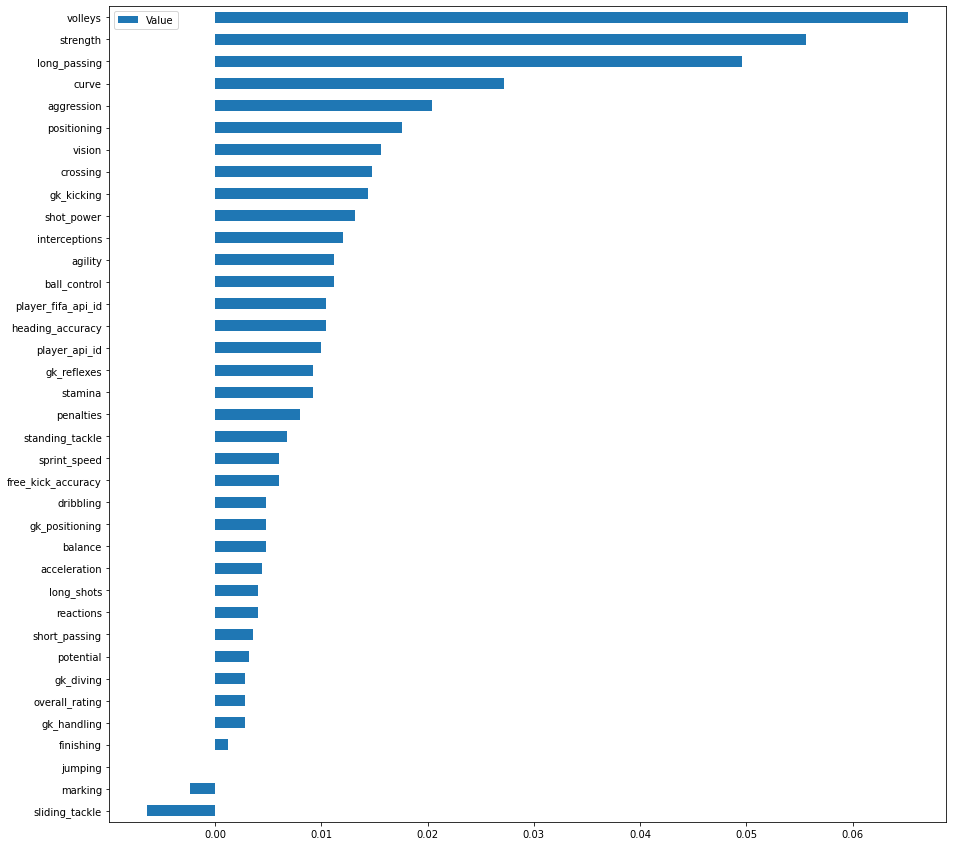

In [20]:
sorted_idx = perm_importance.importances_mean.argsort()
df= pd.DataFrame(perm_importance.importances_mean[sorted_idx], x_test.columns[sorted_idx], columns=['Value'])
df.plot.barh(figsize=(15,15))

from what we see above we can conclude that what are the variables that affect the prediction the most which is preferred foot value of the football player
and how significant is the effect from every variable to the prediction value 

In [108]:
df_svr_right =pd.DataFrame({'Strength':data['strength'],'Volleys':data['volleys'],'Preferred_Foot':data['preferred_foot']}) 
df_svr_right=df_svr_right.sort_values(by=['Strength'],ascending=False)
df_svr_right[:50]

,Strength,Volleys,Preferred_Foot
id,,,
531,95.0,31.0,right
530,95.0,31.0,right
526,95.0,32.0,right
527,95.0,32.0,right
528,95.0,31.0,right
532,95.0,31.0,right
529,95.0,31.0,right
1256,94.0,70.0,right
1257,94.0,70.0,right
